In [7]:
import numpy as np

# 定义有限域F_13的椭圆曲线参数
p = 13
a = -1
b = 1

# 定义有限域F_13下的所有点
x = np.arange(p)
y = np.arange(p)

# 计算椭圆曲线上的点
curve_points = []
for xi in x:
    for yi in y:
        if (yi**2) % p == (xi**3 + a*xi + b) % p:
            print((xi, yi))
            curve_points.append((xi, yi))

# 解压点坐标
curve_points_x, curve_points_y = zip(*curve_points)


(0, 1)
(0, 12)
(1, 1)
(1, 12)
(3, 5)
(3, 8)
(4, 3)
(4, 10)
(5, 2)
(5, 11)
(6, 4)
(6, 9)
(7, 5)
(7, 8)
(10, 4)
(10, 9)
(12, 1)
(12, 12)


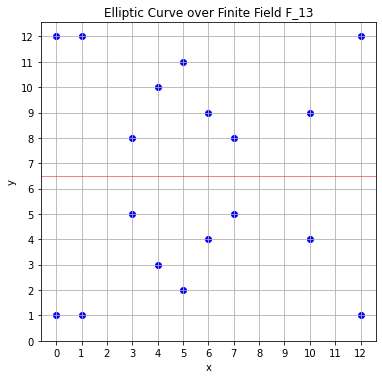

In [8]:
import matplotlib.pyplot as plt

# 绘制椭圆曲线
plt.figure(figsize=(6, 6))
plt.scatter(curve_points_x, curve_points_y, color='blue')
plt.axhline(p/2, color='red',linewidth=0.5)
plt.title('Elliptic Curve over Finite Field F_13')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xticks(np.arange(p))
plt.yticks(np.arange(p))
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


In [13]:
from sympy import mod_inverse

# 定义有限域F_13的椭圆曲线参数
p = 13
a = -1
b = 1

# 计算椭圆曲线上的点
curve_points = []
for xi in range(p):
    for yi in range(p):
        if (yi**2) % p == (xi**3 + a*xi + b) % p:
            curve_points.append((xi, yi))

# 添加无穷远点
curve_points.append(('inf', 'inf'))

# 定义加法运算
def elliptic_curve_addition(P, Q, a, p):
    if P == ('inf', 'inf'):
        return Q
    if Q == ('inf', 'inf'):
        return P
    if P[0] == Q[0] and (P[1] != Q[1] or P[1] == 0):
        # P + Q = O (无穷远点) 如果它们是垂直对称的点或P是切点
        return ('inf', 'inf')
    if P == Q:
        # 点翻倍
        lambda_ = (3 * P[0]**2 + a) * mod_inverse(2 * P[1], p) % p
    else:
        # 点加法
        lambda_ = (Q[1] - P[1]) * mod_inverse(Q[0] - P[0], p) % p

    x3 = (lambda_**2 - P[0] - Q[0]) % p
    y3 = (lambda_ * (P[0] - x3) - P[1]) % p

    return (x3, y3)

# 创建加法表格
addition_table = [[None for _ in curve_points] for _ in curve_points]
for i, P in enumerate(curve_points):
    for j, Q in enumerate(curve_points):
        addition_table[i][j] = elliptic_curve_addition(P, Q, a, p)

# 打印加法表格
# for row in addition_table:
#     print(row)

import pandas as pd

# 将加法表格转换为Pandas DataFrame以美化输出
addition_table_df = pd.DataFrame(addition_table, index=curve_points, columns=curve_points)

# 设置显示选项以确保表格能够整齐地打印
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 打印加法表格
print(addition_table_df)


                (0, 1)     (0, 12)      (1, 1)     (1, 12)      (3, 5)  \
(0, 1)         (10, 4)  (inf, inf)    (12, 12)      (3, 5)      (6, 4)   
(0, 12)     (inf, inf)     (10, 9)      (3, 8)     (12, 1)     (1, 12)   
(1, 1)        (12, 12)      (3, 8)     (12, 1)  (inf, inf)      (0, 1)   
(1, 12)         (3, 5)     (12, 1)  (inf, inf)    (12, 12)      (5, 2)   
(3, 5)          (6, 4)     (1, 12)      (0, 1)      (5, 2)      (7, 8)   
(3, 8)          (1, 1)      (6, 9)     (5, 11)     (0, 12)  (inf, inf)   
(4, 3)          (6, 9)     (10, 4)      (7, 8)     (4, 10)     (10, 9)   
(4, 10)        (10, 9)      (6, 4)      (4, 3)      (7, 5)     (5, 11)   
(5, 2)          (7, 8)    (12, 12)      (3, 5)     (10, 4)      (4, 3)   
(5, 11)        (12, 1)      (7, 5)     (10, 9)      (3, 8)      (1, 1)   
(6, 4)         (4, 10)      (3, 5)     (10, 4)      (7, 8)      (7, 5)   
(6, 9)          (3, 8)      (4, 3)      (7, 5)     (10, 9)     (0, 12)   
(7, 5)         (5, 11)      (7, 8)    

In [1]:
import numpy as np

# 定义有限域F_13的椭圆曲线参数
p = 5
a = -1
b = 0

# 定义有限域F_13下的所有点
x = np.arange(p)
y = np.arange(p)

# 计算椭圆曲线上的点
curve_points = []
for xi in x:
    for yi in y:
        if (yi**2) % p == (xi**3 + a*xi + b) % p:
            print((xi, yi))
            curve_points.append((xi, yi))

# 解压点坐标
curve_points_x, curve_points_y = zip(*curve_points)


(0, 0)
(1, 0)
(2, 1)
(2, 4)
(3, 2)
(3, 3)
(4, 0)


In [2]:
from sympy import mod_inverse

# 定义有限域F_13的椭圆曲线参数
p = 5
a = -1
b = 0

# 计算椭圆曲线上的点
curve_points = []
for xi in range(p):
    for yi in range(p):
        if (yi**2) % p == (xi**3 + a*xi + b) % p:
            curve_points.append((xi, yi))

# 添加无穷远点
curve_points.append(('inf', 'inf'))

# 定义加法运算
def elliptic_curve_addition(P, Q, a, p):
    if P == ('inf', 'inf'):
        return Q
    if Q == ('inf', 'inf'):
        return P
    if P[0] == Q[0] and (P[1] != Q[1] or P[1] == 0):
        # P + Q = O (无穷远点) 如果它们是垂直对称的点或P是切点
        return ('inf', 'inf')
    if P == Q:
        # 点翻倍
        lambda_ = (3 * P[0]**2 + a) * mod_inverse(2 * P[1], p) % p
    else:
        # 点加法
        lambda_ = (Q[1] - P[1]) * mod_inverse(Q[0] - P[0], p) % p

    x3 = (lambda_**2 - P[0] - Q[0]) % p
    y3 = (lambda_ * (P[0] - x3) - P[1]) % p

    return (x3, y3)

# 创建加法表格
addition_table = [[None for _ in curve_points] for _ in curve_points]
for i, P in enumerate(curve_points):
    for j, Q in enumerate(curve_points):
        addition_table[i][j] = elliptic_curve_addition(P, Q, a, p)

# 打印加法表格
# for row in addition_table:
#     print(row)

import pandas as pd

# 将加法表格转换为Pandas DataFrame以美化输出
addition_table_df = pd.DataFrame(addition_table, index=curve_points, columns=curve_points)

# 设置显示选项以确保表格能够整齐地打印
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 打印加法表格
print(addition_table_df)


                (0, 0)      (1, 0)      (2, 1)      (2, 4)      (3, 2)  \
(0, 0)      (inf, inf)      (4, 0)      (2, 4)      (2, 1)      (3, 3)   
(1, 0)          (4, 0)  (inf, inf)      (3, 3)      (3, 2)      (2, 4)   
(2, 1)          (2, 4)      (3, 3)      (0, 0)  (inf, inf)      (1, 0)   
(2, 4)          (2, 1)      (3, 2)  (inf, inf)      (0, 0)      (4, 0)   
(3, 2)          (3, 3)      (2, 4)      (1, 0)      (4, 0)      (0, 0)   
(3, 3)          (3, 2)      (2, 1)      (4, 0)      (1, 0)  (inf, inf)   
(4, 0)          (1, 0)      (0, 0)      (3, 2)      (3, 3)      (2, 1)   
(inf, inf)      (0, 0)      (1, 0)      (2, 1)      (2, 4)      (3, 2)   

                (3, 3)      (4, 0)  (inf, inf)  
(0, 0)          (3, 2)      (1, 0)      (0, 0)  
(1, 0)          (2, 1)      (0, 0)      (1, 0)  
(2, 1)          (4, 0)      (3, 2)      (2, 1)  
(2, 4)          (1, 0)      (3, 3)      (2, 4)  
(3, 2)      (inf, inf)      (2, 1)      (3, 2)  
(3, 3)          (0, 0)      (2, 4)     